In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
link= '/content/drive/MyDrive/Colab Notebooks/Project 1'
customers= pd.read_csv(os.path.join(link, 'olist_customers_dataset.csv'))
geolocation= pd.read_csv(os.path.join(link, 'olist_geolocation_dataset.csv'))
items= pd.read_csv(os.path.join(link, 'olist_order_items_dataset.csv'))
payments= pd.read_csv(os.path.join(link, 'olist_order_payments_dataset.csv'))
reviews= pd.read_csv(os.path.join(link, 'olist_order_reviews_dataset.csv'))
orders= pd.read_csv(os.path.join(link, 'olist_orders_dataset.csv'))
products= pd.read_csv(os.path.join(link, 'olist_products_dataset.csv'))
sellers= pd.read_csv(os.path.join(link, 'olist_sellers_dataset.csv'))
category= pd.read_csv(os.path.join(link, 'product_category_name_translation.csv'))


#Categorias

Product-> product_id, product_category_name

items-> product_id, order_id, price

In [ ]:
merged_cat = pd.merge(
    products[['product_id', 'product_category_name']],
    items[['product_id', 'order_id', 'price']],
    on='product_id',
    how='inner'
)
merged_cat

,product_id,product_category_name,order_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90
...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,59e88b7d3675e89aceaf86f372d3bc9a,29.90
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90


In [ ]:
cat_freq = merged_cat['product_category_name'].value_counts().reset_index()
cat_freq.columns = ['product_category_name', 'frecuencia']
cat_freq

,product_category_name,frecuencia
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
...,...,...
68,la_cuisine,14
69,cds_dvds_musicais,14
70,pc_gamer,9
71,fashion_roupa_infanto_juvenil,8


In [ ]:
cat_sum = merged_cat.groupby('product_category_name')['price'].sum().reset_index()
cat_sum.columns = ['product_category_name', 'total_price']
cat_sum

,product_category_name,total_price
0,agro_industria_e_comercio,72530.47
1,alimentos,29393.41
2,alimentos_bebidas,15179.48
3,artes,24202.64
4,artes_e_artesanato,1814.01
...,...,...
68,sinalizacao_e_seguranca,21509.23
69,tablets_impressao_imagem,7528.41
70,telefonia,323667.53
71,telefonia_fixa,59583.00


In [ ]:
cat_stats = merged_cat.groupby('product_category_name').agg(
    frecuencia=('product_id', 'count'),
    total_price=('price', 'sum')
).reset_index()


/tmp/ipython-input-2073198827.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cat_stats['product_category_name'], rotation=45, ha='right')


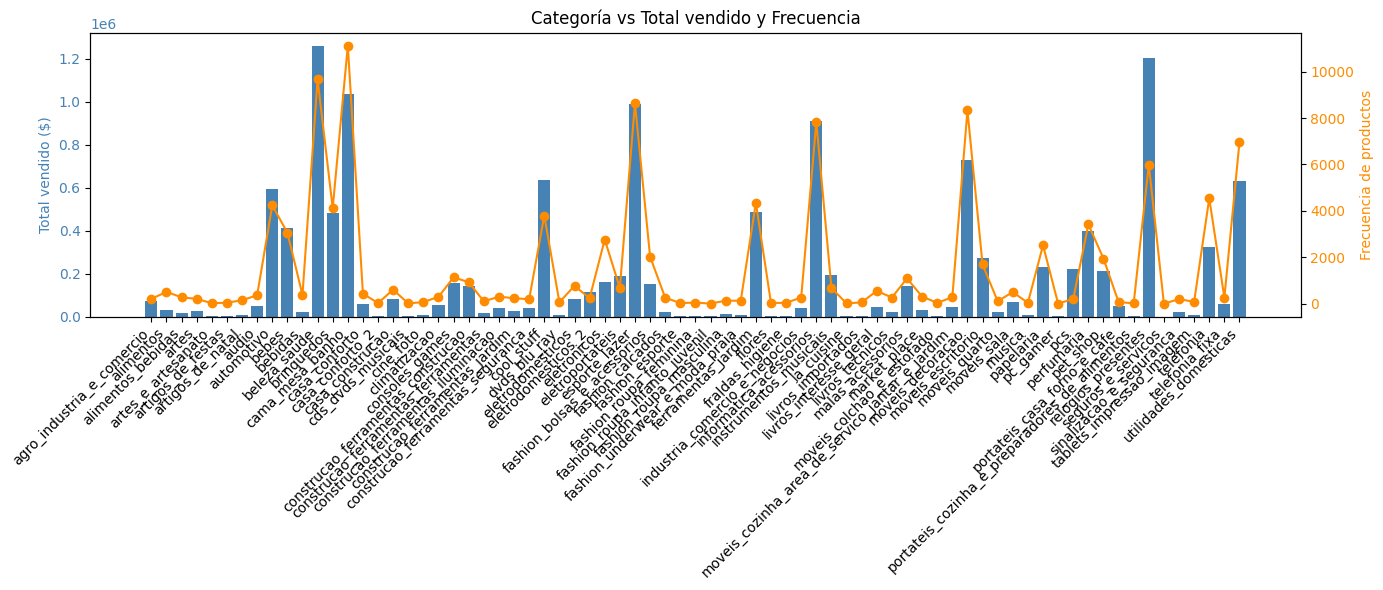

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# Primer eje: total_price
ax1.bar(cat_stats['product_category_name'], cat_stats['total_price'], color='steelblue', label='Total vendido')
ax1.set_ylabel('Total vendido ($)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(cat_stats['product_category_name'], rotation=45, ha='right')

# Segundo eje: frecuencia
ax2 = ax1.twinx()
ax2.plot(cat_stats['product_category_name'], cat_stats['frecuencia'], color='darkorange', marker='o', label='Frecuencia')
ax2.set_ylabel('Frecuencia de productos', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Título y leyendas
plt.title('Categoría vs Total vendido y Frecuencia')
fig.tight_layout()
plt.show()


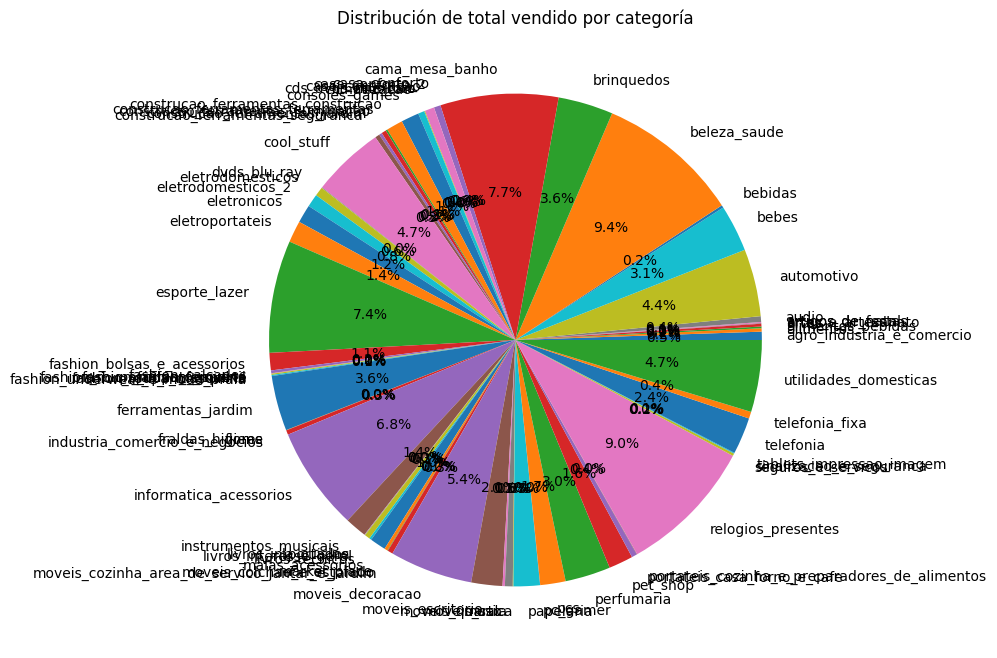

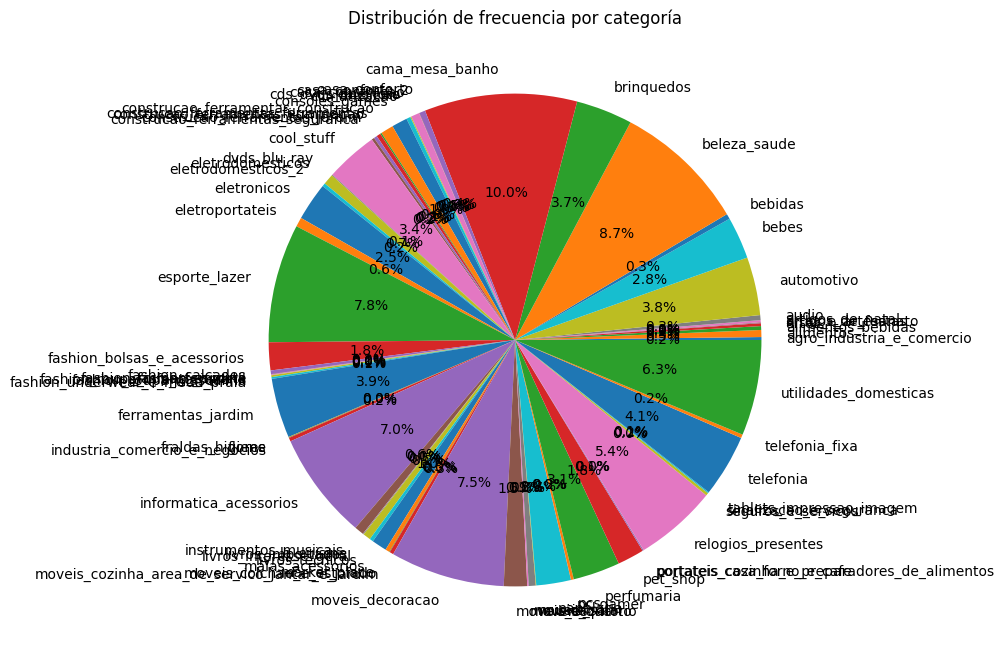

In [ ]:
# Pie chart de total_price por categoría
cat_stats.plot.pie(y='total_price', labels=cat_stats['product_category_name'], autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Distribución de total vendido por categoría')
plt.ylabel('')
plt.show()

# Pie chart de frecuencia por categoría
cat_stats.plot.pie(y='frecuencia', labels=cat_stats['product_category_name'], autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Distribución de frecuencia por categoría')
plt.ylabel('')
plt.show()


#Meses por ventas

Orders -> order_id, order_estimate_delivery_date

Items -> order_id, price

In [ ]:
merged_month = pd.merge(
    orders[['order_id', 'order_delivered_customer_date']],
    items[['order_id', 'price']],
    on='order_id',
    how='inner'
)

# Asegurarse de que la columna de fecha sea tipo datetime
merged_month['order_delivered_customer_date'] = pd.to_datetime(merged_month['order_delivered_customer_date'])

# Extraer año y mes
merged_month['year'] = merged_month['order_delivered_customer_date'].dt.year
merged_month['month'] = merged_month['order_delivered_customer_date'].dt.month

merged_month = merged_month.dropna()
merged_month.isnull().sum()


,0
order_id,0
order_delivered_customer_date,0
price,0
year,0
month,0


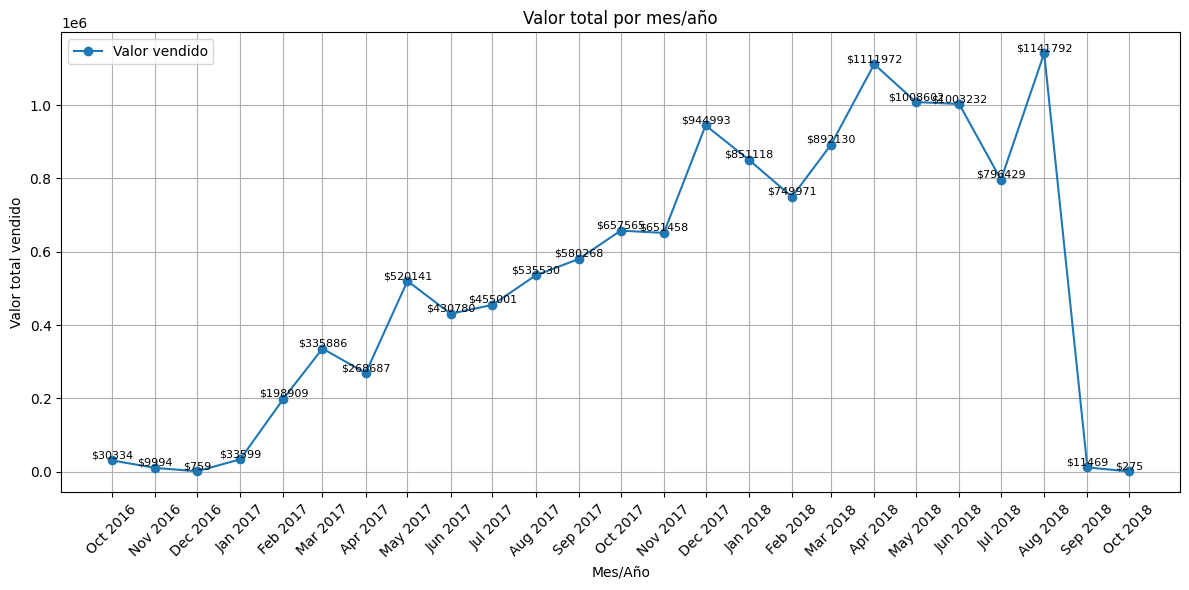

In [ ]:

monthly_sales = merged_month.groupby(['year', 'month'])['price'].sum().reset_index()
monthly_sales['year_month'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

# Crear etiquetas tipo "Ene 2017"
monthly_sales['label'] = monthly_sales['year_month'].dt.strftime('%b %Y')  # %b = nombre corto del mes

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['price'], marker='o', label='Valor vendido')
plt.title('Valor total por mes/año')
plt.xlabel('Mes/Año')
plt.ylabel('Valor total vendido')
plt.grid(True)

# Usar etiquetas personalizadas para el eje X
plt.xticks(ticks=monthly_sales['year_month'], labels=monthly_sales['label'], rotation=45)

# Añadir etiquetas de valor a cada punto
for i, row in monthly_sales.iterrows():
    plt.text(row['year_month'], row['price'], f"${row['price']:.0f}",
             ha='center', va='bottom', fontsize=8, rotation=0)

plt.tight_layout()
plt.legend()
plt.show()


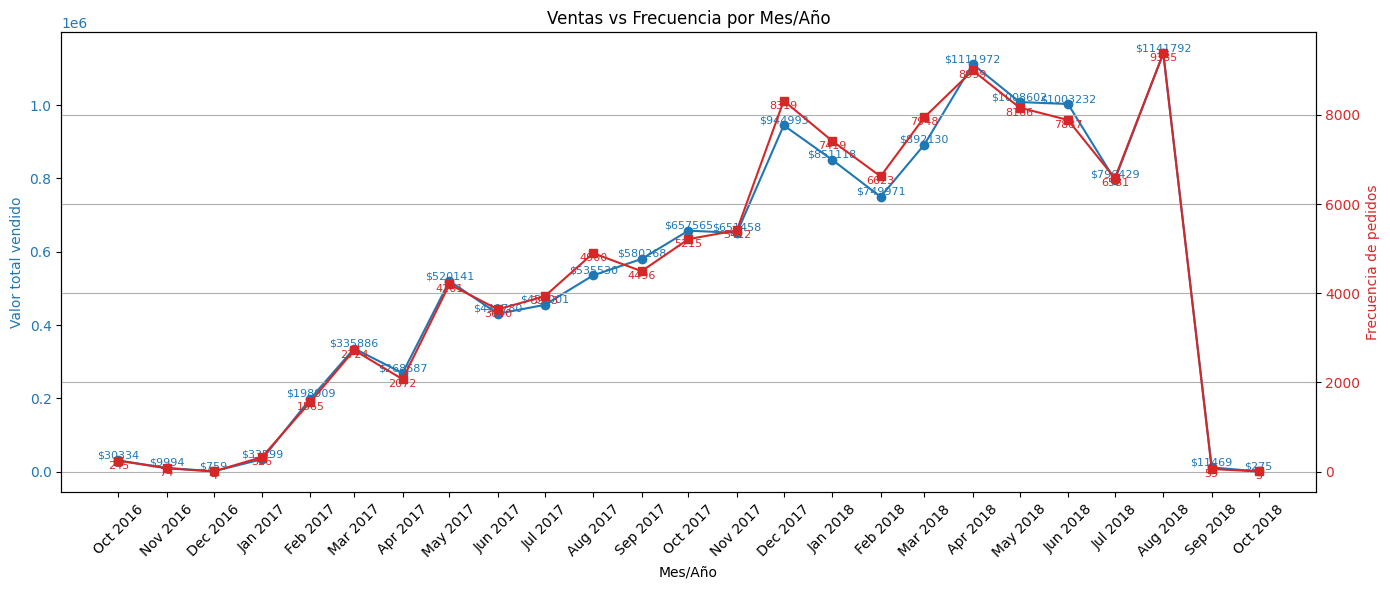

In [ ]:
# Agrupar valor total
monthly_sales = merged_month.groupby(['year', 'month'])['price'].sum().reset_index()
monthly_sales['year_month'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))
monthly_sales['label'] = monthly_sales['year_month'].dt.strftime('%b %Y')

# Agrupar frecuencia (cantidad de pedidos)
monthly_freq = merged_month.groupby(['year', 'month'])['order_id'].count().reset_index()
monthly_freq['year_month'] = pd.to_datetime(monthly_freq[['year', 'month']].assign(day=1))
monthly_freq['label'] = monthly_freq['year_month'].dt.strftime('%b %Y')

# --- Unir gráficas en una sola con dos ejes Y ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Primer eje: Valor total vendido
color1 = 'tab:blue'
ax1.set_xlabel('Mes/Año')
ax1.set_ylabel('Valor total vendido', color=color1)
ax1.plot(monthly_sales['year_month'], monthly_sales['price'], color=color1, marker='o', label='Valor vendido')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(monthly_sales['year_month'])
ax1.set_xticklabels(monthly_sales['label'], rotation=45)

# Etiquetas de valor en cada punto
for i, row in monthly_sales.iterrows():
    ax1.text(row['year_month'], row['price'], f"${row['price']:.0f}",
             ha='center', va='bottom', fontsize=8, color=color1)

# Segundo eje: Frecuencia de pedidos
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Frecuencia de pedidos', color=color2)
ax2.plot(monthly_freq['year_month'], monthly_freq['order_id'], color=color2, marker='s', label='Frecuencia de pedidos')
ax2.tick_params(axis='y', labelcolor=color2)

# Etiquetas de frecuencia en cada punto
for i, row in monthly_freq.iterrows():
    ax2.text(row['year_month'], row['order_id'], str(row['order_id']),
             ha='center', va='top', fontsize=8, color=color2)

# Título y diseño final
plt.title('Ventas vs Frecuencia por Mes/Año')
fig.tight_layout()
plt.grid(True)
plt.show()

#BRAZIL MAP

ITEMS ->  price, ID seller

Sellers-> ID Seller, seller_zip_code_prefix, seller_city

Geolocation-> geo_lat, geo lng, geolocation_zip_code_prefix



In [ ]:
# Renombrar columnas para coincidir
items.rename(columns={'ID seller': 'seller_id'}, inplace=True)
sellers.rename(columns={'ID Seller': 'seller_id', 'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geolocation.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

# Unir las tablas
map1 = pd.merge(items, sellers, on='seller_id', how='left')
mapfull = pd.merge(map1, geolocation, on='zip_code_prefix', how='left')

# Seleccionar solo las columnas requeridas
mapfull = mapfull[['price', 'seller_id', 'zip_code_prefix', 'seller_state', 'geolocation_lat', 'geolocation_lng']]

# Ver resultado
mapfull = mapfull.dropna()

mapfull



,price,seller_id,zip_code_prefix,seller_state,geolocation_lat,geolocation_lng
0,58.9,48436dade18ac8b2bce089ec2a041202,27277,SP,-22.498183,-44.123614
1,58.9,48436dade18ac8b2bce089ec2a041202,27277,SP,-22.487885,-44.131566
2,58.9,48436dade18ac8b2bce089ec2a041202,27277,SP,-22.501227,-44.132443
3,58.9,48436dade18ac8b2bce089ec2a041202,27277,SP,-22.500389,-44.124773
4,58.9,48436dade18ac8b2bce089ec2a041202,27277,SP,-22.499963,-44.127571
...,...,...,...,...,...,...
16252667,43.0,f7ccf836d21b2fb1de37564105216cc1,14940,SP,-21.753823,-48.835501
16252668,43.0,f7ccf836d21b2fb1de37564105216cc1,14940,SP,-21.758844,-48.826249
16252669,43.0,f7ccf836d21b2fb1de37564105216cc1,14940,SP,-21.765902,-48.824481
16252670,43.0,f7ccf836d21b2fb1de37564105216cc1,14940,SP,-21.760676,-48.847655


In [ ]:
# Agrupar por ciudad y sumar el total recaudado
recaudo_por_ciudad = mapfull.groupby('seller_state').agg({
    'price': 'sum',
    'geolocation_lat': 'first',
    'geolocation_lng': 'first'
}).reset_index()

# Renombrar columnas para mayor claridad
recaudo_por_ciudad.rename(columns={
    'price': 'total_recaudado',
    'geo_lat': 'lat',
    'geo_lng': 'lng'
}, inplace=True)

# Ver resultado
recaudo_por_ciudad


,seller_state,total_recaudado,geolocation_lat,geolocation_lng
0,AC,4.378800e+04,-9.974562,-67.809656
1,AM,3.177900e+04,-3.135623,-60.023469
2,BA,2.328519e+07,-12.895113,-38.338960
3,CE,7.400736e+05,-3.769923,-38.652794
4,DF,4.672788e+06,-15.840667,-48.051943
5,ES,3.154759e+06,-20.297537,-40.400869
6,GO,4.444927e+06,-16.671297,-49.237248
7,MA,3.604486e+06,-2.546079,-44.308986
8,MG,2.504393e+08,-22.264094,-46.158564
9,MS,7.247552e+05,-20.436847,-54.675935


In [ ]:
recaudo_por_ciudad.rename(columns={'total_recaudado': 'porcentaje_recaudado'}, inplace=True)

# Ver resultado
recaudo_por_ciudad

,seller_state,porcentaje_recaudado,geolocation_lat,geolocation_lng
0,AC,4.378800e+04,-9.974562,-67.809656
1,AM,3.177900e+04,-3.135623,-60.023469
2,BA,2.328519e+07,-12.895113,-38.338960
3,CE,7.400736e+05,-3.769923,-38.652794
4,DF,4.672788e+06,-15.840667,-48.051943
5,ES,3.154759e+06,-20.297537,-40.400869
6,GO,4.444927e+06,-16.671297,-49.237248
7,MA,3.604486e+06,-2.546079,-44.308986
8,MG,2.504393e+08,-22.264094,-46.158564
9,MS,7.247552e+05,-20.436847,-54.675935


In [ ]:
!pip install geopandas matplotlib
!pip install cartopy matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 96.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


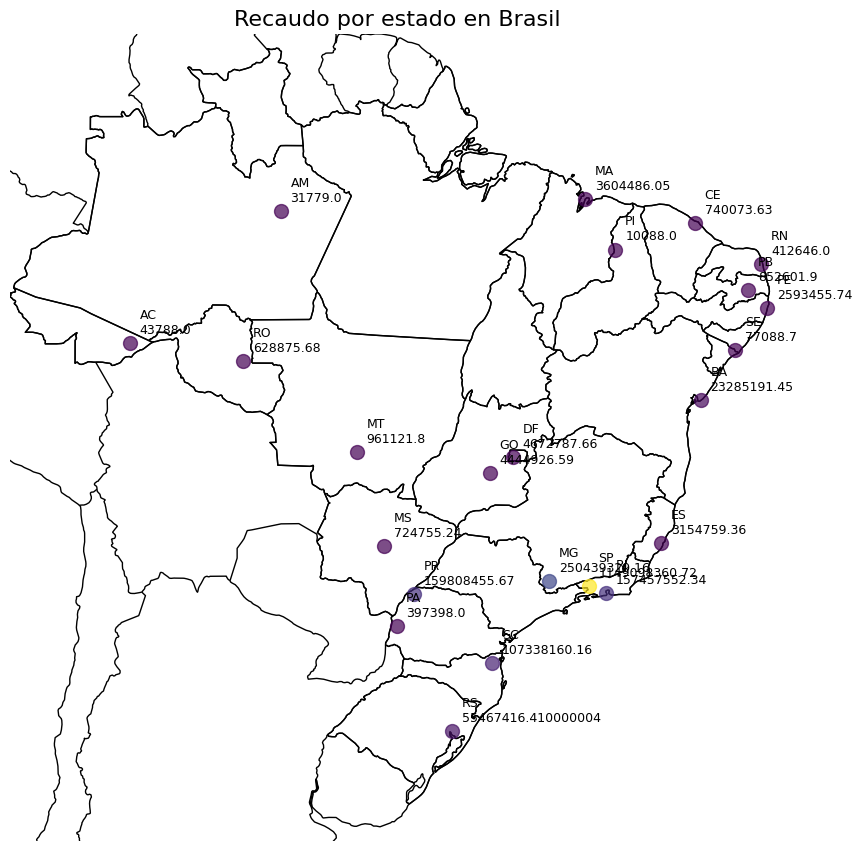

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as colors

# Crear figura y mapa con proyección
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Agregar límites políticos y divisiones internas de Brasil
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')  # divisiones internas

# Limitar el mapa a Brasil
ax.set_extent([-74, -34, -34, 6])  # (lon_min, lon_max, lat_min, lat_max)

# Normalizar los porcentajes para asignar color
norm = colors.Normalize(vmin=recaudo_por_ciudad['porcentaje_recaudado'].min(),
                        vmax=recaudo_por_ciudad['porcentaje_recaudado'].max())
cmap = cm.viridis  # Puedes usar 'plasma', 'coolwarm', 'inferno', etc.


# Graficar bolitas con color según porcentaje
for _, row in recaudo_por_ciudad.iterrows():
    color = cmap(norm(row['porcentaje_recaudado']))
    ax.plot(row['geolocation_lng'], row['geolocation_lat'],
            marker='o',
            markersize=10,  # ajusta tamaño
            color=color,
            alpha=0.7,
            transform=ccrs.PlateCarree())
    # Etiqueta con ciudad y porcentaje
    ax.text(row['geolocation_lng'] + 0.5, row['geolocation_lat'] + 0.5,
            f"{row['seller_state']}\n{row['porcentaje_recaudado']}",
            fontsize=9,
            transform=ccrs.PlateCarree())

# Título y estilo
plt.title('Recaudo por estado en Brasil', fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
# Crear gráfico
fig = px.scatter_geo(
    recaudo_por_ciudad,
    lat='geolocation_lat',
    lon='geolocation_lng',
    text='seller_state',  # Esto se muestra al pasar el mouse
    size='porcentaje_recaudado',
    size_max=30,
    color='porcentaje_recaudado',
    hover_name='seller_state',
    hover_data={'porcentaje_recaudado': ':', 'geolocation_lat': False, 'geolocation_lng': False},
    projection="natural earth",
    scope='south america'
)

fig.update_layout(
    title='Recaudo por Ciudad en Brasil',
    geo=dict(
        showland=True,
        landcolor='rgb(229, 229, 229)',
        countrycolor='black',
        showcountries=True,
        lataxis_range=[-34, 6],
        lonaxis_range=[-74, -34],
    )
)

fig.show()

#VENTAS POR VENDEDOR

In [ ]:
import pandas as pd

# Tabla de frecuencias por vendedor
frecuencia_vendedores = items.groupby('seller_id').agg(
    cantidad_vendida=('order_item_id', 'count'),  # cantidad de productos vendidos
    valor_total_vendido=('price', 'sum')          # suma total del valor de los productos
).reset_index()

# Ordenamos por la cantidad de productos vendidos (opcional)
frecuencia_vendedores = frecuencia_vendedores.sort_values(by='cantidad_vendida', ascending=False)

# Mostrar resultados
frecuencia_vendedores


,seller_id,cantidad_vendida,valor_total_vendido
1235,6560211a19b47992c3666cc44a7e94c0,2033,123304.83
881,4a3ca9315b744ce9f8e9374361493884,1987,200472.92
368,1f50f920176fa81dab994f9023523100,1931,106939.21
2481,cc419e0650a3c5ba77189a1882b7556a,1775,104288.42
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551,160236.57
...,...,...,...
2517,cf281cf8b7affbdfe751b29cc85580e1,1,64.90
2544,d1e2fe627180431ffda076abb303c56f,1,289.00
2539,d1aa1ec0839dcab73a6161130eb1f94a,1,119.90
2538,d1a5cc844736958c11b8efab9a2b4c87,1,237.60


In [ ]:
import plotly.express as px

# Crear gráfico interactivo SIN leyenda pero con colores únicos
fig = px.scatter(
    frecuencia_vendedores,
    x='cantidad_vendida',
    y='valor_total_vendido',
    hover_data={
        'seller_id': True,
        'cantidad_vendida': True,
        'valor_total_vendido': True
    },
    color_discrete_sequence=px.colors.qualitative.T10  # Colores sin usar 'color='
)

# Agregar color manualmente sin crear leyenda (si necesitas muchas diferencias de color, puedes aumentar el set de colores)
frecuencia_vendedores['color'] = frecuencia_vendedores['seller_id'].astype('category').cat.codes

# Aplicar configuración
fig.update_traces(marker=dict(color=frecuencia_vendedores['color']))

fig.update_layout(
    showlegend=False,
    xaxis_title='Cantidad Vendida',
    yaxis_title='Valor Total Vendido',
    title='Vendedores: Cantidad Vendida vs Valor Total Vendido',
    width=900,
    height=600
)

fig.show()


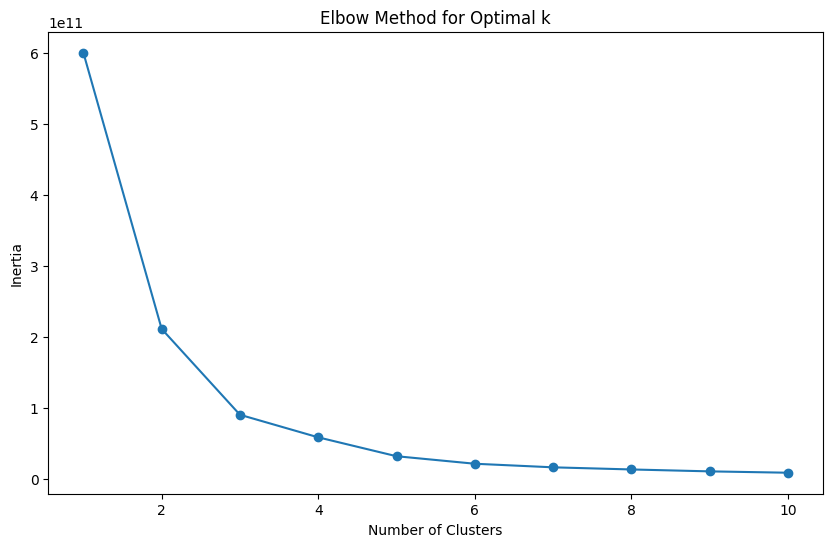

In [ ]:
from sklearn.cluster import KMeans
sell_clustering= frecuencia_vendedores[['cantidad_vendida', 'valor_total_vendido']]
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(sell_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(sell_clustering)
sell_clustering['cluster'] = kmeans.labels_
display(sell_clustering.head())

/tmp/ipython-input-3679192791.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cantidad_vendida,valor_total_vendido,cluster
1235,2033,123304.83,1
881,1987,200472.92,1
368,1931,106939.21,1
2481,1775,104288.42,1
2643,1551,160236.57,1


/tmp/ipython-input-1506328940.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



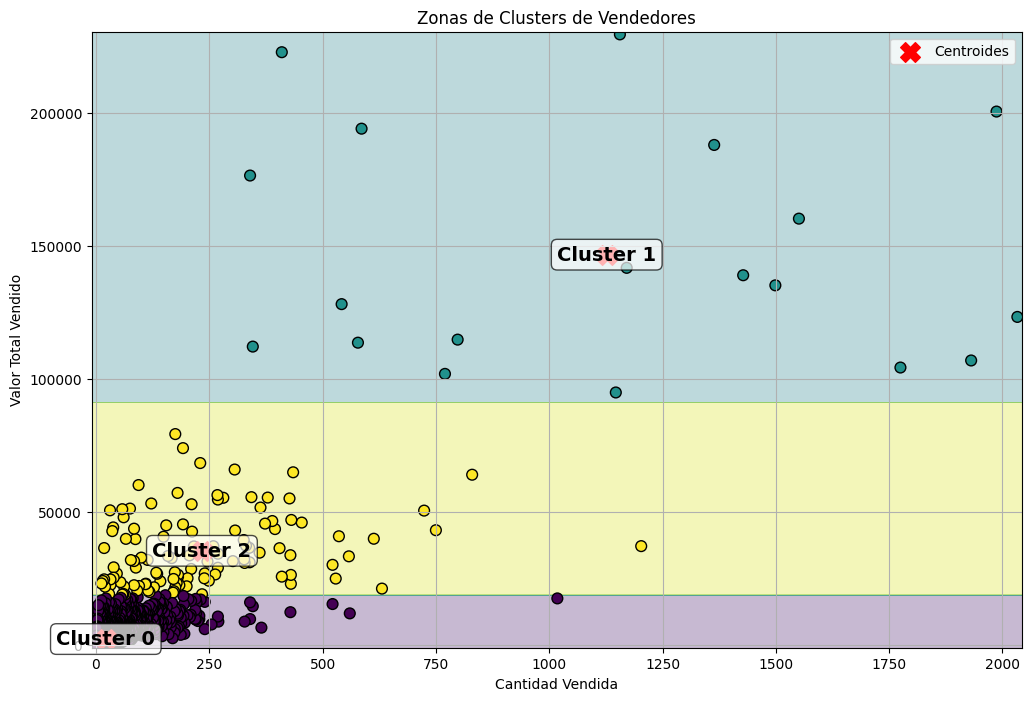

In [ ]:

# Paso 1: Selección de columnas
sell_clustering = frecuencia_vendedores[['cantidad_vendida', 'valor_total_vendido']]

# Paso 2: Método del codo (ya lo hiciste antes, así que lo omitimos aquí)

# Paso 3: Aplicar KMeans con k óptimo
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans.fit(sell_clustering)
sell_clustering['cluster'] = kmeans.labels_

# Malla para pintar zonas
x_min, x_max = sell_clustering['cantidad_vendida'].min() - 10, sell_clustering['cantidad_vendida'].max() + 10
y_min, y_max = sell_clustering['valor_total_vendido'].min() - 1000, sell_clustering['valor_total_vendido'].max() + 1000

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Zonas coloreadas

# Puntos
plt.scatter(sell_clustering['cantidad_vendida'],
            sell_clustering['valor_total_vendido'],
            c=sell_clustering['cluster'], cmap='viridis', s=60, edgecolor='k')

# Centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=200, marker='X', label='Centroides')

# Etiquetas de cada zona cerca del centroide
for i, (x, y) in enumerate(centroids):
    plt.text(x, y, f'Cluster {i}', fontsize=14, weight='bold',
             ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

# Estética
plt.title('Zonas de Clusters de Vendedores')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Valor Total Vendido')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Tabla extendida con estadísticas por cluster
resumen_clusters = sell_clustering.groupby('cluster').agg(
    cantidad_promedio=('cantidad_vendida', 'mean'),
    cantidad_minima=('cantidad_vendida', 'min'),
    cantidad_maxima=('cantidad_vendida', 'max'),

    valor_promedio=('valor_total_vendido', 'mean'),
    valor_minimo=('valor_total_vendido', 'min'),
    valor_maximo=('valor_total_vendido', 'max'),

    cantidad_vendedores=('cluster', 'count')
).round(2)

# Mostrar tabla
print("Resumen detallado por cluster:")
display(resumen_clusters)


Resumen detallado por cluster:


,cantidad_promedio,cantidad_minima,cantidad_maxima,valor_promedio,valor_minimo,valor_maximo,cantidad_vendedores
cluster,,,,,,,
0,21.66,1,1018,2262.05,3.5,18729.64,2960
1,1126.95,340,2033,146697.88,94914.2,229472.63,19
2,233.75,12,1203,35420.01,18969.0,79284.55,116


#REVIEWS

In [ ]:
print("Valores nulos en 'reviews':\n", reviews.isnull().sum())

Valores nulos en 'reviews':
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

In [ ]:
review_counts = reviews['review_score'].value_counts().sort_index()
print("Frecuencia de reviews por puntuación:")
print(review_counts)

Frecuencia de reviews por puntuación:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


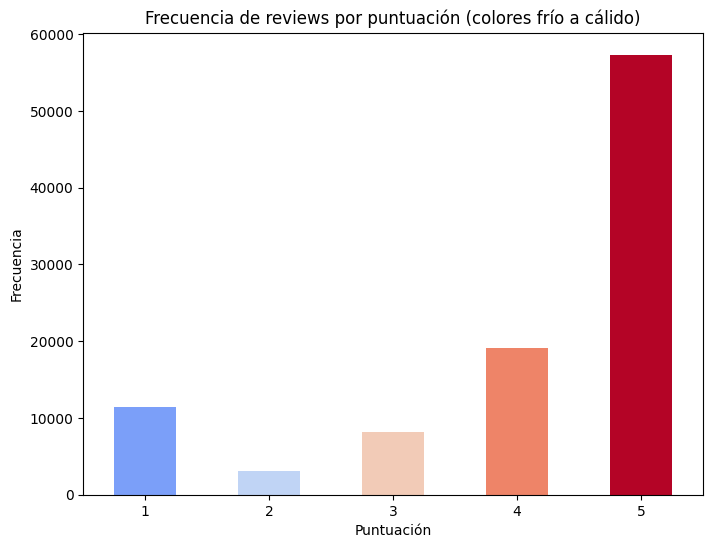

In [ ]:
plt.figure(figsize=(8, 6))
ax = review_counts.plot(kind='bar', color=plt.cm.coolwarm(review_counts.index / review_counts.index.max()))
plt.title('Frecuencia de reviews por puntuación (colores frío a cálido)')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [ ]:
reviews['review_score']

,review_score
0,4
1,5
2,5
3,5
4,5
...,...
99219,5
99220,5
99221,5
99222,4


In [ ]:
low_score_reviews = reviews[reviews['review_score'].isin([1, 2])][['order_id', 'review_creation_date', 'review_answer_timestamp','review_score']]
display(low_score_reviews.head())

,order_id,review_creation_date,review_answer_timestamp,review_score
5,b18dcdf73be66366873cd26c5724d1dc,2018-04-13,2018-04-16 00:39:37,1
16,0dacf04c5ad59fd5a0cc1faa07c34e39,2018-01-18,2018-01-20 21:25:45,2
19,583174fbe37d3d5f0d6661be3aad1786,2018-08-15,2018-08-15 04:10:37,1
29,0ce9a24111d850192a933fcaab6fbad3,2017-12-13,2017-12-16 07:14:07,1
32,68e55ca79d04a79f20d4bfc0146f4b66,2018-04-08,2018-04-09 12:22:39,1


In [ ]:
answer_time=low_score_reviews['review_answer_timestamp'] - low_score_reviews['review_creation_date']

In [ ]:
max_answer_time = answer_time.max()
min_answer_time = answer_time.min()
mean_answer_time = answer_time.mean()

In [ ]:
print(f"Tiempo máximo de respuesta: {max_answer_time}")
print(f"Tiempo mínimo de respuesta: {min_answer_time}")
print(f"Tiempo medio de respuesta: {mean_answer_time}")

Tiempo máximo de respuesta: 518 days 16:46:52
Tiempo mínimo de respuesta: 0 days 02:24:24
Tiempo medio de respuesta: 3 days 00:58:32.429090909


In [ ]:
answer_time_days = answer_time.dt.days
days=10
answer_time_filtered = answer_time_days[answer_time_days <= days]

frequency_table = answer_time_filtered.value_counts().sort_index()
print("Tabla de frecuencias del tiempo de respuesta (hasta 150 días):")
print(frequency_table)

Tabla de frecuencias del tiempo de respuesta (hasta 150 días):
0     5026
1     3369
2     2433
3     1591
4      691
5      376
6      266
7      159
8       98
9       76
10      73
Name: count, dtype: int64


In [ ]:
reviews_days = pd.DataFrame({
    'order_id': reviews['order_id'],
    'review_score': reviews['review_score'],
    'days': (pd.to_datetime(reviews['review_answer_timestamp']) - pd.to_datetime(reviews['review_creation_date'])).dt.days
})

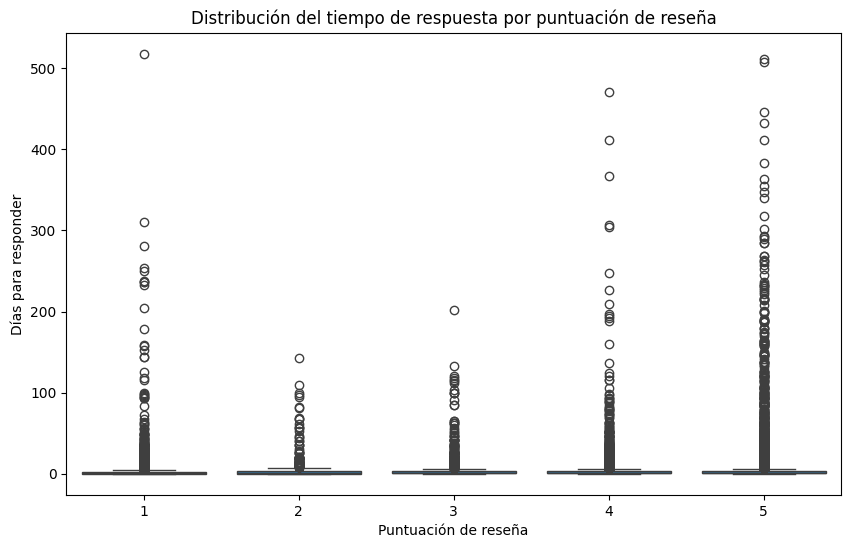

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=reviews_days, x='review_score', y='days')
plt.title('Distribución del tiempo de respuesta por puntuación de reseña')
plt.xlabel('Puntuación de reseña')
plt.ylabel('Días para responder')
plt.show()

## Preparar los datos para el agrupamiento

### Subtarea:
Seleccionar las columnas 'review_score' y 'days' del DataFrame `reviews_days` para realizar el agrupamiento.

**Razonamiento**:  
Seleccionar las columnas especificadas del DataFrame `reviews_days` y mostrar las primeras filas del nuevo DataFrame.


In [ ]:
reviews_for_clustering = reviews_days[['review_score', 'days']]
display(reviews_for_clustering.head())

,review_score,days
0,4,0
1,5,1
2,5,1
3,5,0
4,5,1


## Determinar el número óptimo de clústeres

### Subtarea:
Utilizar el método del codo para encontrar un número adecuado de clústeres para K-Means.


**Razonamiento**:  
Utilizar el método del codo para determinar el número óptimo de clústeres calculando y graficando la inercia para diferentes cantidades de clústeres.




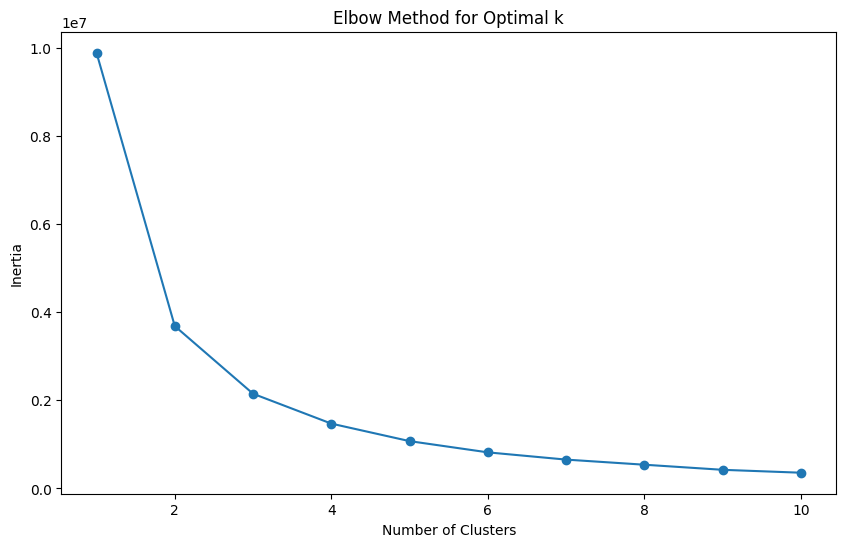

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(reviews_for_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Aplicar agrupamiento K-Means

### Subtarea:
Realizar el agrupamiento K-Means sobre los datos seleccionados con el número de clústeres determinado.

**Razonamiento**:  
Ejecutar el algoritmo K-Means con 3 clústeres y agregar las etiquetas de clúster al DataFrame.


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(reviews_for_clustering)
reviews_for_clustering['cluster'] = kmeans.labels_
display(reviews_for_clustering.head())

,review_score,days,cluster
0,4,0,0
1,5,1,0
2,5,1,0
3,5,0,0
4,5,1,0


## Visualize the clusters

### Subtask:
Plot the data points, colored by their assigned cluster, to visualize the clustering result.


**Reasoning**:
Create a scatter plot to visualize the clusters based on review score and days to respond.



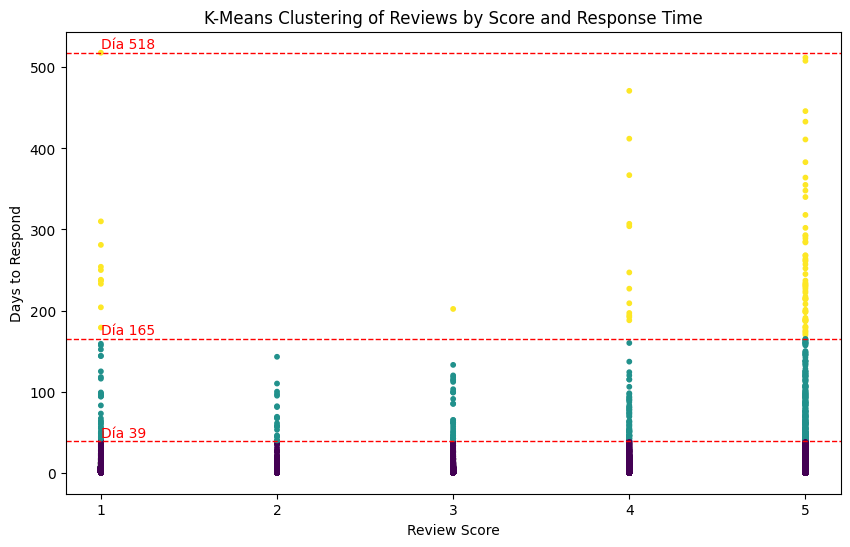

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(
    reviews_for_clustering['review_score'],
    reviews_for_clustering['days'],
    c=reviews_for_clustering['cluster'],
    cmap='viridis',
    s=10
)

# Líneas horizontales
for y in [39, 165, 518]:
    plt.axhline(y=y, color='red', linestyle='--', linewidth=1)
    plt.text(
        x=reviews_for_clustering['review_score'].min(),
        y=y + 5,
        s=f'Día {y}',
        color='red'
    )

# Etiquetas y título
plt.xticks(range(int(reviews_for_clustering['review_score'].min()), int(reviews_for_clustering['review_score'].max()) + 1, 1))
plt.title('K-Means Clustering of Reviews by Score and Response Time')
plt.xlabel('Review Score')
plt.ylabel('Days to Respond')
plt.show()

## Analizar las características de los clústeres

### Subtarea:
Examinar las características de cada clúster para entender los diferentes grupos de reseñas según la puntuación y el tiempo de respuesta.

**Razonamiento**:  
Calcular y mostrar las estadísticas descriptivas para cada clúster.




In [ ]:
cluster_characteristics = reviews_for_clustering.groupby('cluster')[['review_score', 'days']].agg(['mean', 'median', 'std', 'min', 'max'])
display(cluster_characteristics)

review_score                                 days                    \
                mean median       std min max        mean median        std   
cluster                                                                       
0           4.085982    5.0  1.347663   1   5    2.060103    1.0   3.073018   
1           4.150485    5.0  1.322342   1   5   76.293689   64.0  33.216369   
2           4.292683    5.0  1.365246   1   5  260.902439  233.5  84.849993   

                   
         min  max  
cluster            
0          0   39  
1         40  165  
2        170  518

## Resumen:

### Hallazgos clave del análisis de datos

*   El número óptimo de clústeres determinado mediante el método del codo fue 3.  
*   El algoritmo K-Means asignó correctamente cada reseña a uno de los tres clústeres.  
*   El Clúster 0 representa reseñas con puntajes promedio altos (~4.09) y tiempos de respuesta rápidos (~2.06 días).  
*   El Clúster 1 consiste en reseñas con puntajes promedio igualmente altos (~4.15), pero con tiempos de respuesta significativamente más largos (~76.29 días).  
*   El Clúster 2 incluye reseñas con los puntajes promedio más altos (~4.29), pero también con los tiempos de respuesta promedio más largos (~260.90 días).  
*   Aunque todos los clústeres presentan puntajes promedio positivos, se diferencian claramente por el tiempo promedio de respuesta, lo que indica grupos distintos basados en la eficiencia de respuesta.

### Conclusiones o próximos pasos

*   Investigar los factores que contribuyen a las diferencias significativas en los tiempos de respuesta entre los clústeres, a pesar de tener puntajes de reseña similares.  
*   Utilizar los clústeres identificados para realizar análisis o intervenciones específicas, como enfocarse en mejorar los tiempos de respuesta de las reseñas que caen en los clústeres con mayores periodos de respuesta.
